In [2]:
import librosa
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import Audio
import collections
import numpy as np
%matplotlib notebook


<IPython.core.display.Javascript object>


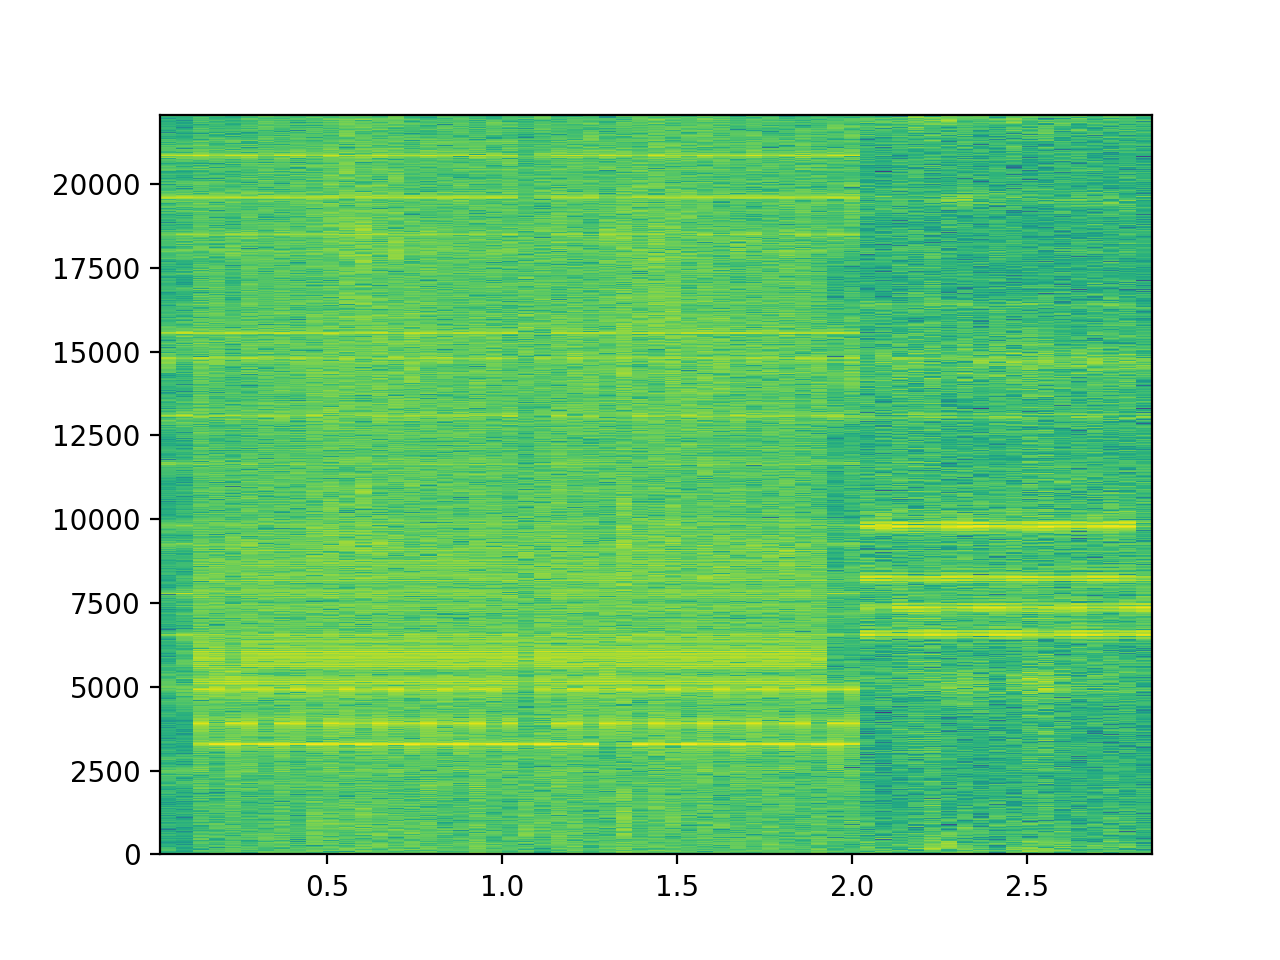

In [3]:
fig, ax = plt.subplots()
samples, fs = librosa.load(r"/Users/ji-macbook15/Desktop/moo/1.mp3", sr=44100, mono=True) #song number 1
S, freqs, times, im = ax.specgram(samples[::100], NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2)) 

samples2, fs2 = librosa.load(r"/Users/ji-macbook15/Desktop/moo/2.mp3", sr=44100, mono=True) #song number 2
S2, freqs2, times2, im2 = ax.specgram(samples2[::100], NFFT=4096, Fs=fs2,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2)) 

samples3, fs3 = librosa.load(r"/Users/ji-macbook15/Desktop/moo/2.mp3", sr=44100, mono=True) #song number 2
S3, freqs3, times3, im3 = ax.specgram(samples3[::100], NFFT=4096, Fs=fs3,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2)) 

In [ ]:
database = {}

def addtodb(name, spec, frequencies, thetimes):
    
    ys, xs = np.histogram(spec.flatten(), bins=len(freqs)//2, normed=True)
    dx = xs[-1] - xs[-2]
    cdf = np.cumsum(ys)*dx  # this gives you the cumulative distribution of amplitudes
    cutoff = xs[np.searchsorted(cdf, 0.77)]

    foreground = (spec >= cutoff)
    
    a = np.where(foreground, spec, 0)
    bins = np.argwhere(a)
    
    
    for i in range(bins.shape[0] - 1):
        for j in range(20):
            if (i + 1 + j) < bins.shape[0]:
                t1 = np.round(thetimes[bins[i + j][1]],2)
                f1 = np.round(frequencies[bins[i + j][0]],2)
                t2 = np.round(thetimes[bins[i + 1 + j][1]], 2)
                f2 = np.round(frequencies[bins[i + 1 + j][0]], 2)
                x = (f1, f2, t2 - t1)
                if x in database:
                    database[x].append((name,t1))
                else:
                    database[x] = [(name, t1)]  
#     return database
    
addtodb("what u need", S2, freqs2, times2)
addtodb("im the one", S, freqs, times)
addtodb("in the night", S3, freqs, times3)

In [ ]:
def match_song(db, excerpt): #note to self: excerpt = [(f1,f2,deltaT),(),]
    templist = []
    for notes in excerpt:
        if (notes in database):
            templist.append(tuple(database[notes]))
    print(templist)
    counts = collections.Counter(templist)
    return counts.most_common()[0][0][0]

match_song(database, [(0,0,0.51)])
#(323.0, 323.0, 0.040000000000000036)